# Etude Statistique

Problématique: Prédiction des entrées dans les cinémas français

Auteur:
- Boukharfien Zainab
- Houssoy Adrien
- Hurdebourcq Paul

Contexte: Nous cherchons à prédire le nombre d'entrées d'un cinéma sur l'année 2020 à l'aide de différentes variables caractéristiques.


## Installation et découverte de l'environement de travail

### Importations des bibliothèques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr, chi2_contingency

%matplotlib inline

### Importation des données

In [ ]:
data=pd.read_csv("cinematographiques-propre.csv",sep=';',encoding='latin1')
data.head()

,N° auto,nom,région administrative,adresse,code INSEE,commune,population de la commune,DEP,N°UU,unité urbaine,...,nombre de films en semaine 1,PdM en entrées des films français,PdM en entrées des films américains,PdM en entrées des films européens,PdM en entrées des autres films,films Art et Essai,PdM en entrées des films Art et Essai,latitude,longitude,geolocalisation
0,55,ELYSEES LINCOLN,ILE-DE-FRANCE,14 RUE LINCOLN,75108,Paris 8e Arrondissement,36694,75,851,Paris,...,53,"48,82847702","5,617302493","26,36427356","19,18994693",61,"87,62891759","48,870512","2,303157","48,870512,2,303157"
1,204,UGC OPERA,ILE-DE-FRANCE,32 BD DES ITALIENS,75109,Paris 9e Arrondissement,59408,75,851,Paris,...,41,"47,16468714","42,30156431","10,49210603","0,041642526",33,"53,34226535","48,871332","2,335302","48,871332,2,335302"
2,301,MAX LINDER,ILE-DE-FRANCE,24 BD POISSONNIERE,75109,Paris 9e Arrondissement,59408,75,851,Paris,...,8,"6,97058738","49,98399907","35,58607046","7,459343089",64,"53,67294097","48,871363","2,344886","48,871363,2,344886"
3,451,UGC MONTPARNASSE,ILE-DE-FRANCE,83 BD DU MONTPARNASSE,75106,Paris 6e Arrondissement,42428,75,851,Paris,...,63,"43,58109209","38,32192339","15,69030155","2,406682967",45,"39,64221679","48,84351","2,325646","48,84351,2,325646"
4,731,MK2 ODEON COTE SAINT-GERMAIN,ILE-DE-FRANCE,113 BD ST GERMAIN,75106,Paris 6e Arrondissement,42428,75,851,Paris,...,58,"55,90664627","24,3213105","13,33991217","6,43213105",48,"68,84195984","48,852437","2,338266","48,852437,2,338266"


### Présentation du jeu de données

In [ ]:
print(f"Nombre de cinéma étudiées: {data.shape[0]}")
print(f"Nombre de caractéristiques (variable): {data.shape[1]}")

Nombre de cinéma étudiées: 2042
Nombre de caractéristiques (variable): 40


Le jeu de données dont nous disposons regroupe l'activité des cinémas français en 2020. Nous disposons d'une liste de 2042 cinéma et de 40 variables caractéristiques sur les performances du cinéma.
Les variables sont les suivantes:

- N° auto = Identifiant du cinéma
- nom = Nom du cinéma
- région administrative = Nom de la région
- adresse = Adresse du cinéma
- code INSEE = code insee du cinéma
- commune = Commune du cinéma
- population de la commune = Population de la commune du cinéma
- DEP = Numéro de département
- N°UU = Numéro de l'unité urbaine du cinéma
- unité urbaine = Unité urbaine du cinéma
- population unité urbaine = Population de l'unité urbaine du cinéma
- situation géographique = Localisation du cinéma
- écrans = Nombre d'écran dans le cinéma
- fauteuils = Nombre de fauteuils dans le cinéma
- semaines d'activité = Nombres de semaines où le cinéma a été ouvert
- séances = Nombre de séance du cinéma
- entrées 2020 = Nombres d'entrées en 2020
- entrées 2019 = Nombre d'entrée en 2019
- évolution entrées = Evolution des entrées entre 2019 et 2020
- tranche d'entrées = tranche du nombre d'entrée en 2020
- propriétaire = Nom du propriétaire du cinéma
- programmateur = Nom du programmateur des films diffusées
- AE = appartenance à la catégorie art et essai
- catégorie Art et Essai = catégorie des films art et essais
- label Art et Essai = label des film art et essai
- genre = mobilité du cinéma (fixe ou itinérant)
- multiplexe = appartenance à un multiplexe (oui/non)
- zone de la commune = zone de la comune du cinéma
- nombre de films programmés = Nombre de film programmé par le cinéma
- nombre de films inédits = nombre de film inédit diffusé
- nombre de films en semaine 1 = nombre de film en semaine 1 diffusé
- PdM en entrées des films français = part de marché des films français dans le cinéma
- PdM en entrées des films américains = part de marché des films américains dans le cinéma
- PdM en entrées des films européens = part de marché des films européens dans le cinéma
- PdM en entrées des autres films = part de marché des autres films dans le cinéma
- films Art et Essai = nombre de film art et essaie diffusé
- PdM en entrées des films Art et Essai = part de marché des films art et essai dans le cinéma
- latitude = latitude geographique du cinéma
- longitude = longitude geographqiue du cinéma
- geolocalisation = coordonnées geographique du cinéma



 ## Analyse exploiratoire

### Pré-traitement

Nous allons d'abord vérifier si il n'y a pas de valeur manquante dans notre jeu de données.

Valeurs manquantes par caractéristique :
 N° auto                                     0
nom                                         0
région administrative                       0
adresse                                     1
code INSEE                                  0
commune                                     0
population de la commune                    0
DEP                                         0
N°UU                                        0
unité urbaine                               0
population unité urbaine                    0
situation géographique                      0
écrans                                      0
fauteuils                                   0
semaines d'activité                         0
séances                                     0
entrées 2020                                0
entrées 2019                                0
évolution entrées                           1
tranche d'entrées                           0
propriétaire                          

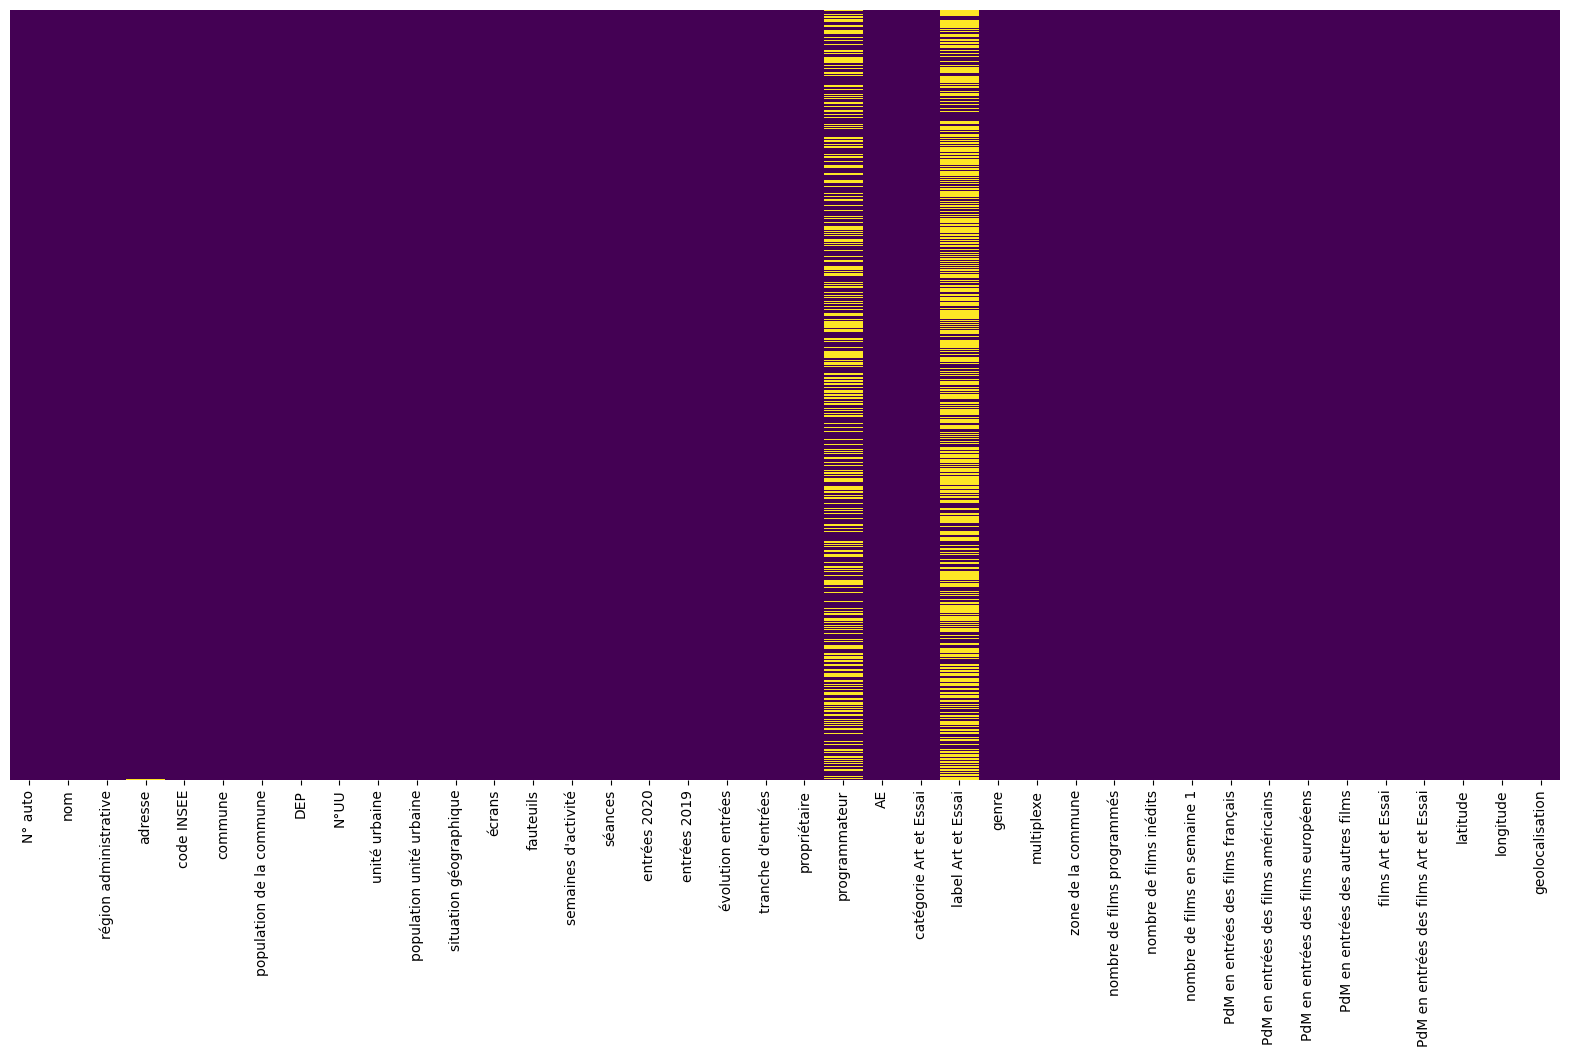

In [ ]:
# Traitement des valeurs manquantes (vérification si elles existent).
missing_values = data.isnull().sum()
print("Valeurs manquantes par caractéristique :\n", missing_values)

plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

On remarque que les colonnes "label Art et Essai" et "programmateur" contiennent beaucoup de valeur manquantes (respectivement 1192 et 854). Ensuite, nous avons aussi d'autre variable comme les part de marché qui possèdent des valeur manquantes.
Pour éviter de polluer notre modèle, nous allons:
- supprimer la colonne "label Art et Essai" car plus de 50% des valeurs de la colonnes sont manquantes
- remplacer les valeurs manquantes des variables numérique par la médiane ou la moyenne
- remplacer les valeurs manquantes des variables "programmateur" avec un algorithme KNN
- supprimer la ligne avec l'adresse manquante car cela ne sera pas cohérents d'inventer 1 adresse ou de créer une adresse fictive qui pourrai fausser les résultats.

In [ ]:
# suppression de la colonne "label Art et Essai"
data=data.drop(columns=['label Art et Essai'],axis=1)
# suppression de la ligne avec l'adresse null
data=data[data['adresse'].notna()]

#Vérification des suppressions
data.shape

(2041, 39)

#### Convertion des données

Avant de commencer à remplacer nos valeur manquantes, nous allons convertir nos données dans le type adéquats (texte, entier et décimal)

In [ ]:
def convertion(df, typ, *var):
    """
    Fonction qui modifie le type des variables

    : param list data : les donnees
    : return : les data avec le bon type pour chaque var
    : rtype : list
    """
    types = ["str","int","float"]
    while typ not in types:
        typ = input("Type non reconnu, merci de choisir entre \"str\", \"int\" ou \"float\" \n►")
    for ele in var:
        if typ == "float" and "float" not in str(df[ele].dtype):
            df[ele] = df[ele].str.replace(",",".")
            df[ele] = df[ele].astype("float")
        elif typ not in str(df[ele].dtype):
            df[ele] = df[ele].astype(str(typ))
    return df

In [ ]:
data = convertion(data, "str", 'N° auto','nom','adresse','région administrative','commune','code INSEE', 'DEP', 'unité urbaine', 'propriétaire','AE', 'catégorie Art et Essai','genre','multiplexe','geolocalisation',"programmateur")
data = convertion(data, "int", 'population de la commune','population unité urbaine','écrans', 'fauteuils', "semaines d'activité",'séances','entrées 2020','entrées 2019', 'nombre de films programmés','nombre de films inédits','nombre de films en semaine 1')
data = convertion(data, "float", 'évolution entrées', 'PdM en entrées des films français', 'PdM en entrées des films américains', 'PdM en entrées des films européens', 'PdM en entrées des autres films', 'PdM en entrées des films Art et Essai')

In [ ]:
for col in data.columns:
    if "object" in str(data[col].dtype):
        print(f"{col}: texte")
    elif "int" in str(data[col].dtype):
        print(f"{col}: Entier")
    elif "float" in str(data[col].dtype):
        print(f"{col}: décimal")

N° auto: texte
nom: texte
région administrative: texte
adresse: texte
code INSEE: texte
commune: texte
population de la commune: Entier
DEP: texte
N°UU: texte
unité urbaine: texte
population unité urbaine: Entier
situation géographique: texte
écrans: Entier
fauteuils: Entier
semaines d'activité: Entier
séances: Entier
entrées 2020: Entier
entrées 2019: Entier
évolution entrées: décimal
tranche d'entrées: texte
propriétaire: texte
programmateur: texte
AE: texte
catégorie Art et Essai: texte
genre: texte
multiplexe: texte
zone de la commune: texte
nombre de films programmés: Entier
nombre de films inédits: Entier
nombre de films en semaine 1: Entier
PdM en entrées des films français: décimal
PdM en entrées des films américains: décimal
PdM en entrées des films européens: décimal
PdM en entrées des autres films: décimal
films Art et Essai: Entier
PdM en entrées des films Art et Essai: décimal
latitude: texte
longitude: texte
geolocalisation: texte


#### Imputation des valeurs manquantes

##### Variables qualitatives

Nous avons remarqué que la variable programmateur contenait beaucoup de valeurs manquantes. Nous avons donc décider de remplacer ces valeurs nulles à l'aide d'un algorithmes KNN qui va déterminer notre programmateur par rapport au 5 plus proche voisin.

In [ ]:
#Encodage de la variable
le=LabelEncoder()
data["programmateur_encoded"]=le.fit_transform(data["programmateur"])
data.loc[data['programmateur'] == 'nan', 'programmateur_encoded'] = np.nan

#Imputation
imputer=KNNImputer(n_neighbors=5)
data["programmateur_encoded"]=imputer.fit_transform(np.array([data["programmateur_encoded"]]).reshape(-1,1))
data["programmateur_encoded"]=round(data["programmateur_encoded"],0)
data['programmateur'] = le.inverse_transform(data['programmateur_encoded'].astype("int"))
data=data.drop(columns=["programmateur_encoded"],axis=1)

##### Variables quantitatives

Nous avons remarqué que les variables ci-dessous possédait des valeurs manquantes. Etant des variables de types numérique, nous avons choisi de remplacer les valeurs nulles par la médiane de cette variable.

In [ ]:
missing_values2=data.isnull().sum()
var_miss=list(missing_values2[missing_values2!=0].index)


In [ ]:
for v in var_miss:
    print(v)
    data[v] = data[v].fillna(data[v].median())


évolution entrées
PdM en entrées des films français
PdM en entrées des films américains
PdM en entrées des films européens
PdM en entrées des autres films
PdM en entrées des films Art et Essai


Valeurs manquantes par caractéristique :
 N° auto                                  0
nom                                      0
région administrative                    0
adresse                                  0
code INSEE                               0
commune                                  0
population de la commune                 0
DEP                                      0
N°UU                                     0
unité urbaine                            0
population unité urbaine                 0
situation géographique                   0
écrans                                   0
fauteuils                                0
semaines d'activité                      0
séances                                  0
entrées 2020                             0
entrées 2019                             0
évolution entrées                        0
tranche d'entrées                        0
propriétaire                             0
programmateur                            0
AE          

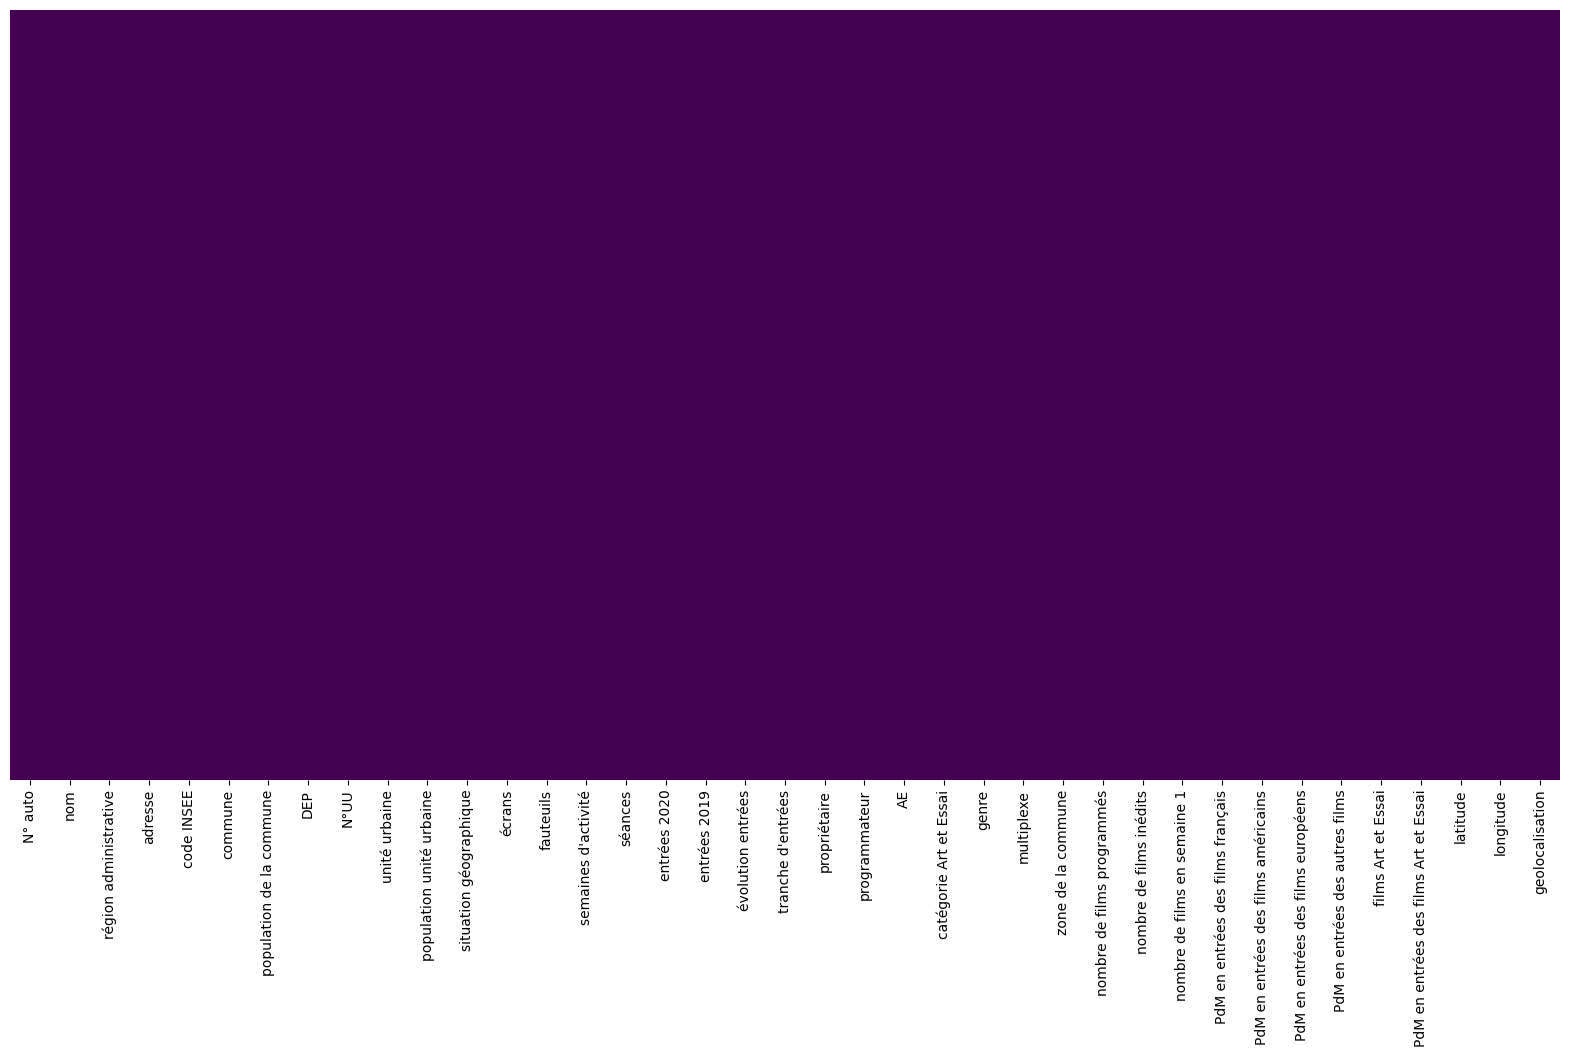

In [ ]:
# Traitement des valeurs manquantes (vérification si elles existent).
missing_values = data.isnull().sum()
print("Valeurs manquantes par caractéristique :\n", missing_values)

plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Analyse

Dans cette partie, nous allons voir comment se comportent les variables de notre dataset. Nous allons d'abord les étuditer une part une, puis nous allons regarder les comparer entre afin de voir si certaines variables sont corrélées entre elles.

#### Analyse univarié

Commençons par trier nos variables. Nous allons mettre d'un côté les variables qualitatives et de l'autre les variables quantitatives. Cette sépartation va nous permettre d'adapter nos analyses.

In [ ]:
def tri_var(df):
  """
  Fonction qui sépare les variables qualitatives et quantitatives
  Param:
    - data (Dataframe): jeu de données initial
  Return:
    - quali (liste) : liste des variables qualitatives
    - quanti (liste) :  liste des variables quantitatives
  """
  quanti=[]
  quali=[]
  df_col=df.columns
  for i in df_col:
    if 'float' in str(df[i].dtypes) or "int" in str(df[i].dtype):
      quanti.append(i)
    else:
      quali.append(i)

  return quali,quanti

In [ ]:
var_quali, var_quanti = tri_var(data)
print("Variables qualitatives : ")
for v in var_quali:
    print(f"\t{v}")

print("\n")

print("Variables quantitatives : ")
for v in var_quanti:
    print(f"\t{v}")

Variables qualitatives : 
	N° auto
	nom
	région administrative
	adresse
	code INSEE
	commune
	DEP
	N°UU
	unité urbaine
	situation géographique
	tranche d'entrées
	propriétaire
	programmateur
	AE
	catégorie Art et Essai
	genre
	multiplexe
	zone de la commune
	latitude
	longitude
	geolocalisation


Variables quantitatives : 
	population de la commune
	population unité urbaine
	écrans
	fauteuils
	semaines d'activité
	séances
	entrées 2020
	entrées 2019
	évolution entrées
	nombre de films programmés
	nombre de films inédits
	nombre de films en semaine 1
	PdM en entrées des films français
	PdM en entrées des films américains
	PdM en entrées des films européens
	PdM en entrées des autres films
	films Art et Essai
	PdM en entrées des films Art et Essai


#### Analyse bivariée

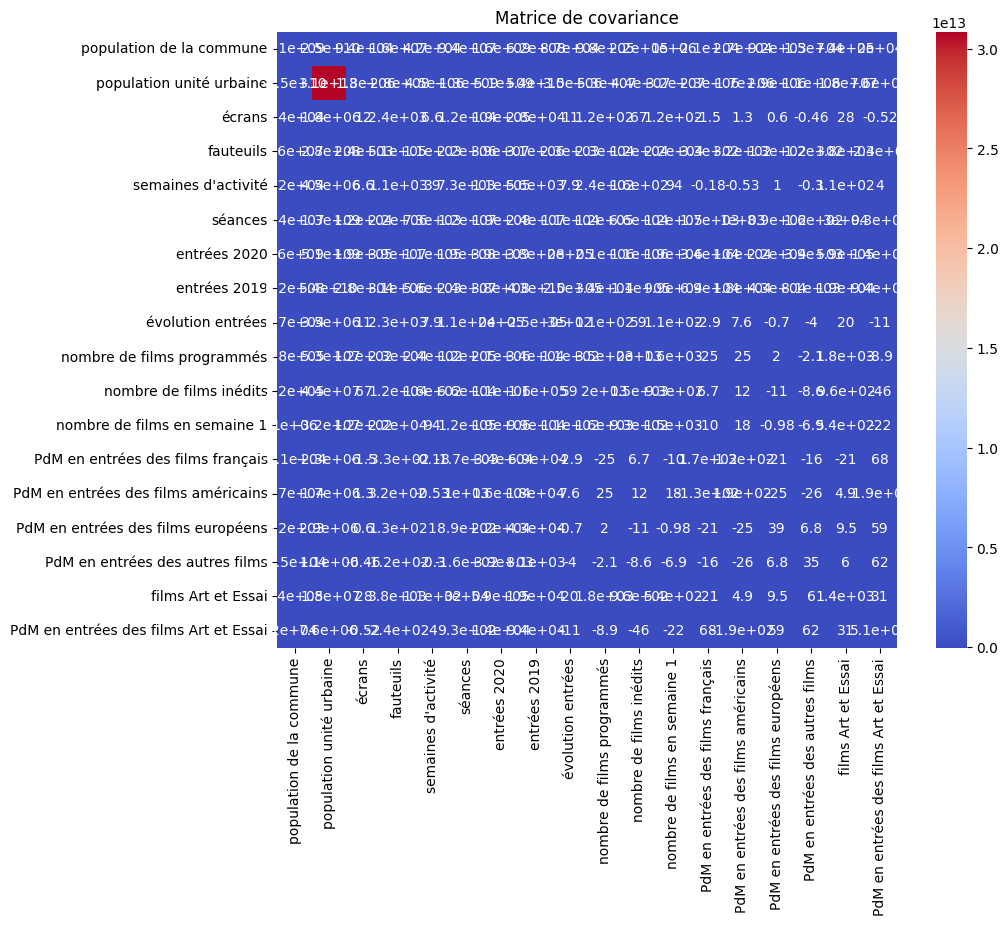

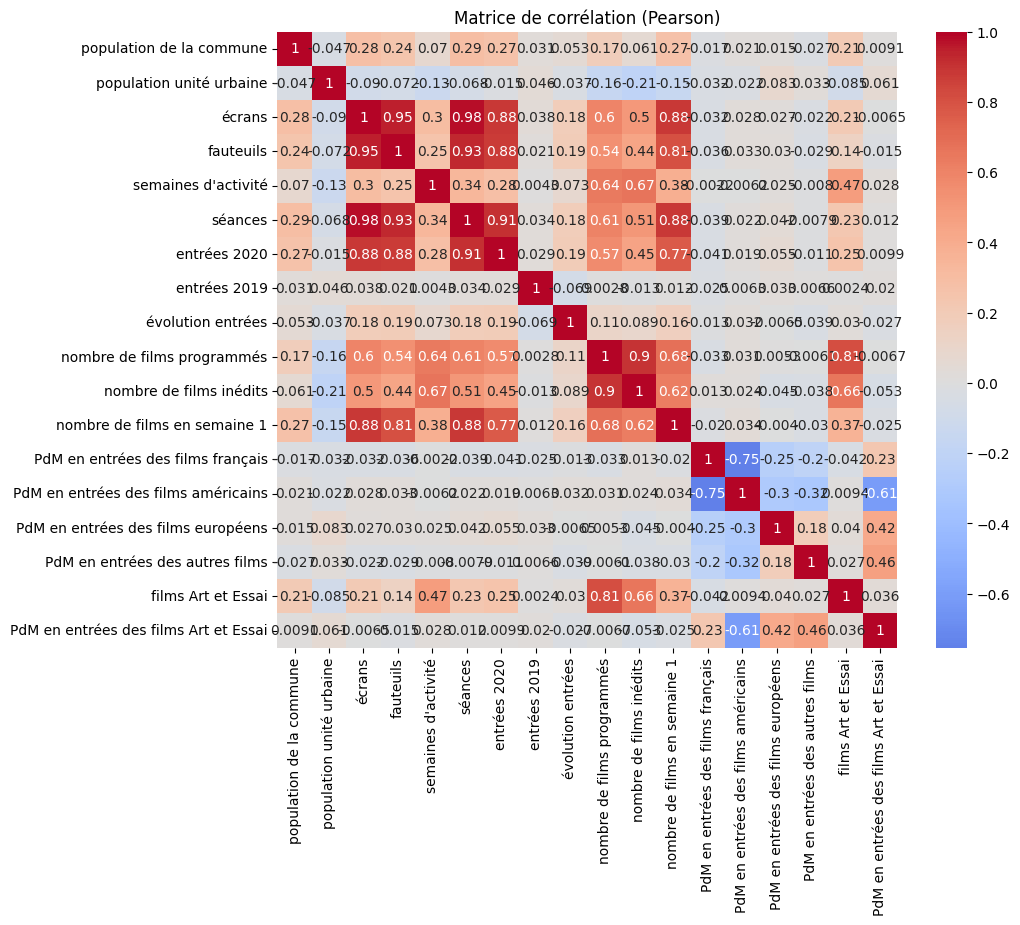

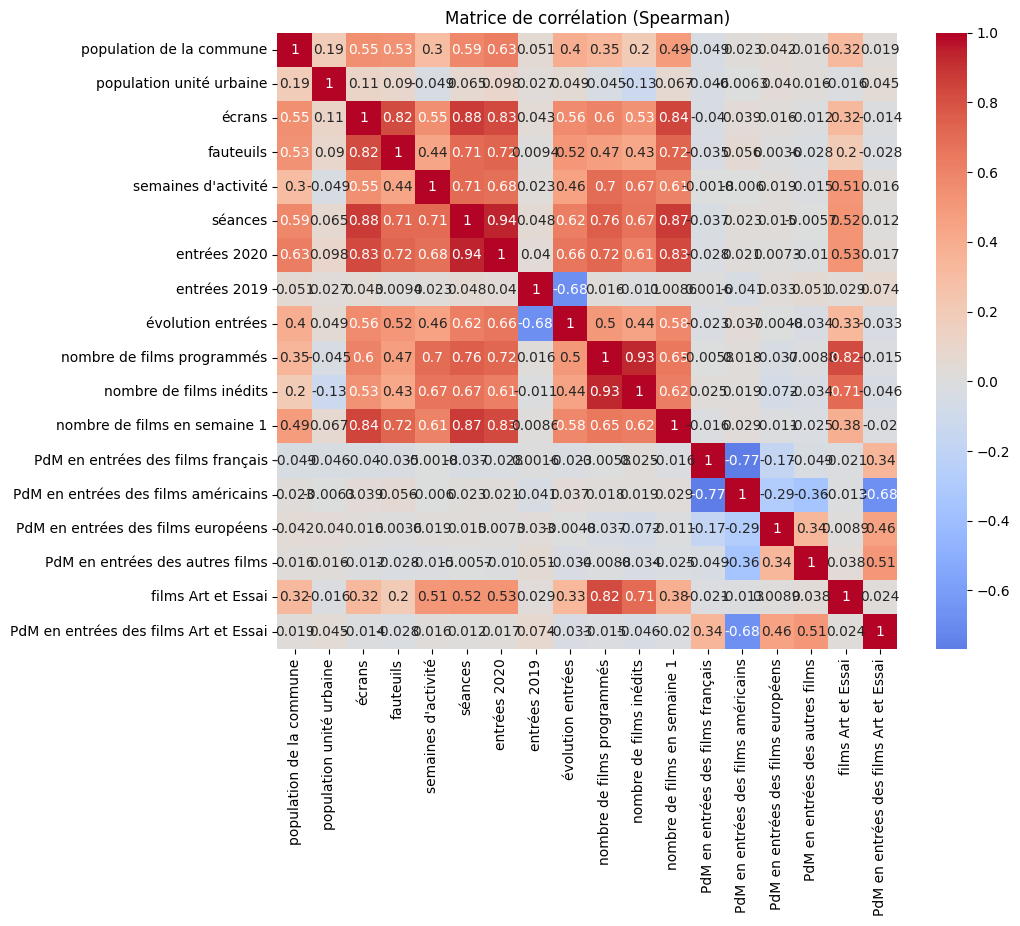

In [ ]:
#Variables Quantitatives

num_cols = data.select_dtypes(include=np.number).columns
df_num = data[num_cols].dropna()

# --- Matrice de covariance ---
cov_matrix = df_num.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de covariance")
plt.show()

# --- Matrice de corrélation Pearson ---
corr_pearson = df_num.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation (Pearson)")
plt.show()

# --- Matrice de corrélation Spearman ---
corr_spearman = df_num.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation (Spearman)")
plt.show()



On constate de fortes corrélations dans cette matrice, à savoir entre les variables suivantes :
Ecrans et fauteuils, écrans et séances, écrans et entrées, écrans et le nombre de films en semaine 1 (respectivement 0.95, 0.98, 0.88, 0.88).
Séanes et fauteuils, séances et entrées, séances et nombre de films en semaine 1 (respectivement 0.93, 0.91, 0.88).
Entrées et fauteuils (0.88).
Nombre de films inédits et nombre de films programmés (0.9).
Qui sont toutes > 0.85

C'est à dire que si une des variables augmente l'autre augmente aussi, et vice-versa.
Si une des variable diminue, l'autre diminue aussi.
Ces variables sont donc l'une dépendante de l'autre.

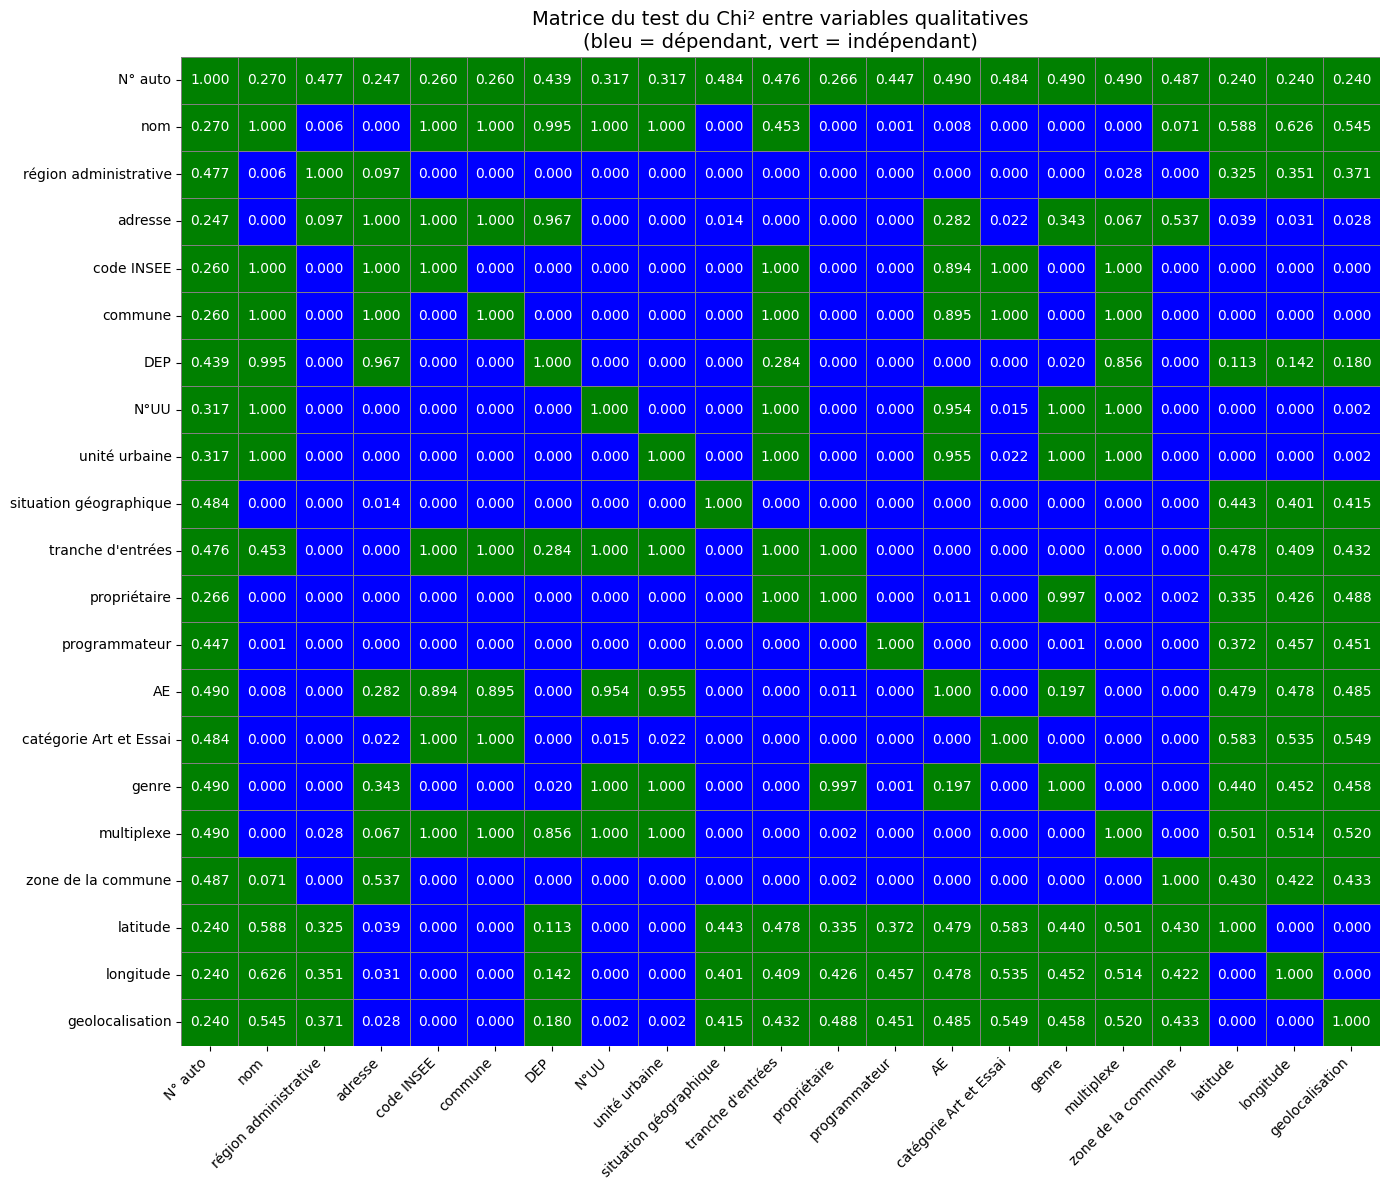

In [90]:
;
from scipy.stats import chi2_contingency

# Sélection des colonnes qualitatives
cat_cols = data.select_dtypes(include=['object', 'category']).columns
df_cat = data[cat_cols].dropna()

# Initialisation des matrices
pval_matrix = pd.DataFrame(np.ones((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)
binary_matrix = pd.DataFrame(np.ones((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)

# Remplissage des matrices
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if i >= j:
            continue
        contingency_table = pd.crosstab(df_cat[col1], df_cat[col2])
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            try:
                chi2, p, dof, ex = chi2_contingency(contingency_table)
                pval_matrix.loc[col1, col2] = p
                pval_matrix.loc[col2, col1] = p
                binary_matrix.loc[col1, col2] = 0 if p < 0.05 else 1
                binary_matrix.loc[col2, col1] = 0 if p < 0.05 else 1
            except:
                pval_matrix.loc[col1, col2] = np.nan
                pval_matrix.loc[col2, col1] = np.nan
                binary_matrix.loc[col1, col2] = np.nan
                binary_matrix.loc[col2, col1] = np.nan

# Palette binaire : 0 = bleu (dépendance), 1 = vert (indépendance)
cmap = sns.color_palette(["blue", "green"])

# Tracé de la heatmap avec p-values comme annotations
plt.figure(figsize=(14, 12))
sns.heatmap(binary_matrix, annot=pval_matrix.round(3), fmt=".3f", cmap=cmap,
            linewidths=0.5, linecolor='grey', cbar=False)
plt.title("Matrice du test du Chi² entre variables qualitatives\n(bleu = dépendant, vert = indépendant)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Pour cette matrice nous nous sommes décidés à mettre 2 couleurs pour préciser si les variables sont dépendentes ou pas les unes des autres.
Pour chaque croisement entre 2 variables où la couleur est verte, cela veut dire que les variables ne sont pas dépendentes l'une de l'autre. Contrairement à la couleur bleue où cela veut dire qu'il y a une association significative entre les variables et qu'elles sont donc dépendentes l'une de l'autre.

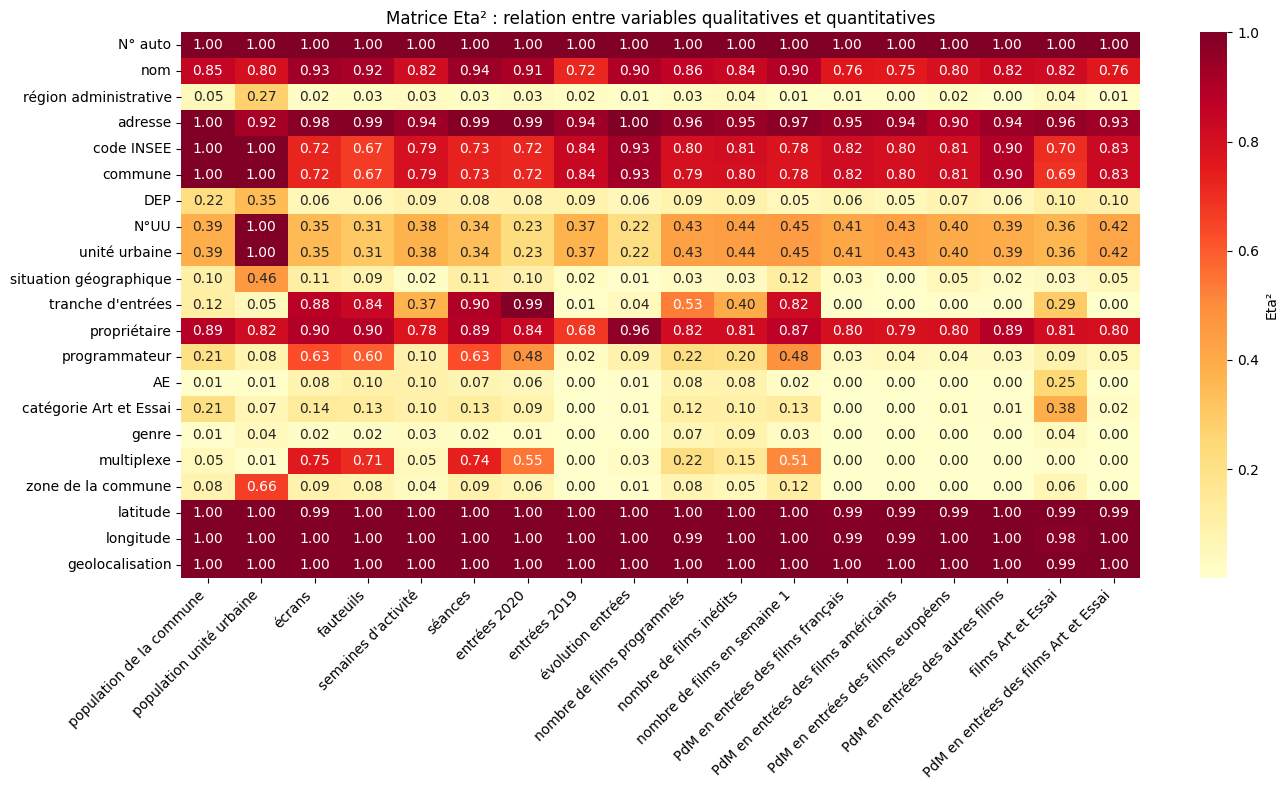

In [ ]:
from scipy.stats import f_oneway

def eta_squared(y, classes):
    """
    Calcule l'eta² (variance expliquée) entre une variable quantitative (y)
    et une variable qualitative (classes).
    """
    classes_unique = np.unique(classes)
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)

    ss_between = sum([
        len(y[classes == group]) * (np.mean(y[classes == group]) - y_mean) ** 2
        for group in classes_unique
    ])

    return ss_between / ss_total if ss_total != 0 else np.nan

def eta_squared_matrix(data, qualitatifs, quantitatifs):
    matrix = pd.DataFrame(index=qualitatifs, columns=quantitatifs)

    for qual in qualitatifs:
        for quant in quantitatifs:
            try:
                eta2 = eta_squared(data[quant].values, data[qual].values)
                matrix.loc[qual, quant] = eta2
            except Exception as e:
                print(f"Erreur pour {qual} vs {quant} : {e}")
                matrix.loc[qual, quant] = np.nan

    return matrix.astype(float)

# Prétraitement : garder uniquement les lignes sans NA
data_clean = data.dropna(subset=cat_cols.union(num_cols))

# Variables
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

quantitatives = num_cols.tolist()
qualitatives = cat_cols.tolist()

# Calcul matrice Eta²
eta2_mat = eta_squared_matrix(data_clean, qualitatifs=qualitatives, quantitatifs=quantitatives)

# Visualisation
plt.figure(figsize=(14, 8))
sns.heatmap(eta2_mat, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Eta²'})
plt.title("Matrice Eta² : relation entre variables qualitatives et quantitatives")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


La grande majorité des variables quantitaives sont expliquées par la variable qualitatives qu'est l'adresse. A savoir que la valeur est &ge; 0.90.
Les autres variables qualitatives qui expliquent à peu près la plupart des variables quantitatives sont le code INSEE, la commune et le propriétaire ainsi que le nom. Le code INSEE et la commune partagent à peu près les mêmes valeurs l'une avec l'autre et donc explique les variables quantitatives au même degré.
Les valeurs sont supérieures à 0.70 pour la plupart, sauf pour quelques exceptions.

Tant que les valeurs sont supérieures les liens entre la variable qualitative et la variable quantitative sont forts.

### Préparation à la modélisation

#### Encodage des variables

In [ ]:
# Encodage ordinal de toutes les variables qualitatives
cat_cols = data.select_dtypes(include=['object', 'category']).columns
data_encoded = data.copy()

for col in cat_cols:
    data_encoded[col] = data[col].astype('category').cat.codes


#### Sélection des variables

Après avoir analysé les matrices précédentes, nous avons choisi les variables suivantes grâce à leur fortes corrélations avec la variable cible qui est donc les entrées 2020.
Ecrans, fauteuils, séances, nom, tranche d'entrées, propriétaire ainsi que la commune.

**Remarque :** nous avons décidé de ne pas prendre en compte la variable adresse pour éviter les risques de surapprentissage.

#### Tests statistiques

In [94]:
from sklearn.model_selection import train_test_split

# Supposons que 'data' est ton DataFrame et 'target' est la colonne à prédire
X = data.drop(columns='entrées 2020')
y = data['entrées 2020']

# Découpage en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
X_train

,N° auto,nom,région administrative,adresse,code INSEE,commune,population de la commune,DEP,N°UU,unité urbaine,...,nombre de films en semaine 1,PdM en entrées des films français,PdM en entrées des films américains,PdM en entrées des films européens,PdM en entrées des autres films,films Art et Essai,PdM en entrées des films Art et Essai,latitude,longitude,geolocalisation
1848,261032,LA FABRIQUE,CENTRE-VAL DE LOIRE,5 RUE DES MAUVES,45203,Meung-sur-Loire,6267,45,45209,Meung-sur-Loire,...,0,69.477365,16.495046,4.118904,9.908685,18,16.650476,"47,826282","1,696401","47,826282,1,696401"
1702,84831,CINETOILE ROCHEVILLE,PROVENCE-ALPES-COTE D'AZUR,2 AVENUE FRANKLIN ROOSEVELT,6030,Le Cannet,41571,6,6701,Nice,...,2,70.811163,21.088066,6.124443,1.976328,40,42.827669,"43,56912","7,005225","43,56912,7,005225"
1561,424781,ST LOUIS,NORMANDIE,15 RUE DE LA CROIX,61484,Val-au-Perche,3737,61,61102,Le Theil,...,0,57.779041,30.812962,5.381846,6.026151,25,23.915103,"48,265259","0,690629","48,265259,0,690629"
1610,720250,MAJESTIC PALACE,PROVENCE-ALPES-COTE D'AZUR,ZAC DES PLAINES DE FIGUEROLLES,13056,Martigues,49403,13,759,Marseille - Aix-en-Provence,...,100,62.631579,7.105263,23.157895,7.105263,27,32.894737,"43,43362","5,050227","43,43362,5,050227"
1691,68517,LE COEUR D'OR,AUVERGNE / RHONE-ALPES,RUE SAINT JEAN,73054,Bourg-Saint-Maurice,7228,73,73204,Bourg-Saint-Maurice,...,76,58.604814,34.590257,6.397159,0.407770,68,21.616170,"45,622605","6,777587","45,622605,6,777587"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,386864,LES 4 PERRAY,ILE-DE-FRANCE,44/46 AV GABRIEL PERI,91549,Sainte-Geneviève-des-Bois,35857,91,851,Paris,...,0,46.619231,44.339518,7.136450,1.904800,0,14.391824,"48,647712","2,326708","48,647712,2,326708"
1294,73098,OCEANOPOLIS,BRETAGNE,PORT DE PLAISANCE MOULIN BLANC,29019,Brest,139163,29,29701,Brest,...,0,68.344035,22.816186,2.568314,6.271465,1,47.827385,"48,391567","-4,434751","48,391567,-4,434751"
860,44239,COUR DE L'ECOLE,AUVERGNE / RHONE-ALPES,COUR DE L'ECOLE,7028,Beaulieu,487,7,0,Zone rurale,...,0,57.420250,29.375867,4.563107,8.640777,2,39.001387,"44,368236","4,268552","44,368236,4,268552"
1459,284613,GAUMONT,PAYS DE LA LOIRE,12 PLACE DU COMMERCE,44109,Nantes,303382,44,44701,Nantes,...,41,70.009479,8.625592,16.682464,4.682464,30,47.734597,"47,213357","-1,558244","47,213357,-1,558244"


In [96]:
y_train

,entrées 2020
1848,1873
1702,5410
1561,3327
1610,91998
1691,19588
...,...
1130,891
1294,311
860,2029
1459,109024


Nous avons On peut donc faire une régression linéaire vu que les variables sont indépendantes l'une de l'autre mais sont dépendantes de la variable cible.

Les variables choisies sont telles :

*   Fauteuils
*   Séances
*   Nombre de films en semaine 1
*   Nom
*   Commune
*   Tranches d'entrées



### Modélisation

#### Création du modèle

#### Evaluation du modèle

### Optimisation du modèle (si nécessaire)

#### Transformation des variables

#### Création du modèle

#### Evaluation du modèle